In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load Data

In [25]:
ford_bike_original = pd.read_csv("2017-fordgobike-tripdata.csv")

In [26]:
ford_bike_original.shape

(519700, 15)

In [27]:
ford_bike_original.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [28]:
ford_bike_drop = ford_bike_original.dropna()

In [29]:
ford_bike_drop.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

In [30]:
ford_bike_drop.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object

In [31]:
ford_bike_drop.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
12,2183,2017-12-31 23:52:55.5810,2018-01-01 00:29:18.7430,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male


# Data Quality Issues
### Define
- start_time and end_time datatype object
### Solution
- Convert to datetime


### Code

In [32]:
ford_bike_drop['start_time'] = pd.to_datetime(ford_bike_drop['start_time'])
ford_bike_drop['end_time'] = pd.to_datetime(ford_bike_drop['end_time'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test

In [33]:
ford_bike_drop.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object

In [34]:
ford_bike_drop['end_time'] - ford_bike_drop['start_time']

0        22:15:10.591000
1        21:53:20.775000
4        12:06:43.570000
6        01:15:07.197000
12       00:36:23.162000
13       00:36:10.987000
15       00:25:44.104000
16       00:24:34.205000
18       00:25:32.456000
19       00:20:16.065000
20       00:06:26.548000
22       00:07:02.017000
28       00:14:31.281000
32       00:12:13.643000
33       00:13:01.991000
34       00:07:55.263000
35       00:02:32.130000
36       00:04:09.475000
39       00:04:03.001000
40       00:13:53.007000
41       00:13:40.456000
46       00:08:58.895000
47       00:09:37.870000
48       00:06:58.158000
52       00:11:47.913000
54       00:20:40.520000
58       00:09:12.358000
59       00:09:06.975000
60       00:03:16.226000
62       00:05:23.760000
               ...      
519670   00:02:03.876000
519671   00:01:13.287000
519672   00:31:49.380000
519673   00:31:48.271000
519674   00:11:12.575000
519675   00:10:02.177000
519676   00:14:53.013000
519677   00:18:56.403000
519678   00:04:28.051000


In [35]:
ford_bike_drop.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male


# Univariate Exploration

# Q1: Which gender most use the bike?

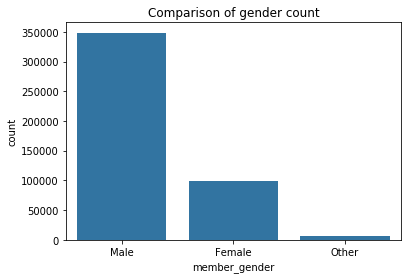

In [36]:
# I use seaborn countplot because gender is categorical and change the color using color palette
plt.title("Comparison of gender count")
base_color = sns.color_palette()[0]
sns.countplot(data=ford_bike_drop,x='member_gender',color=base_color);

- From the graph we can see that male user is the most often to use goBike

# Q2: Which user type most often use the bike?

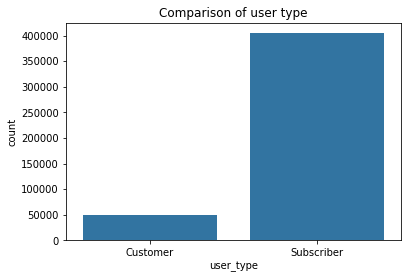

In [37]:
# using seaborn counplot to visualize user_type data which is categorical
plt.title("Comparison of user type")
sns.countplot(data=ford_bike_drop,x="user_type",color=base_color)

- From the graph bar we can see that subscriber user is the most often to user GoBike

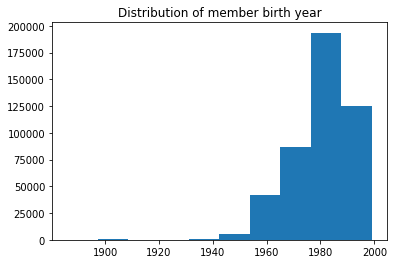

In [38]:
#trying to see distribution of birth year by using pyplot hist function
plt.title("Distribution of member birth year")
plt.hist(ford_bike_drop['member_birth_year']);

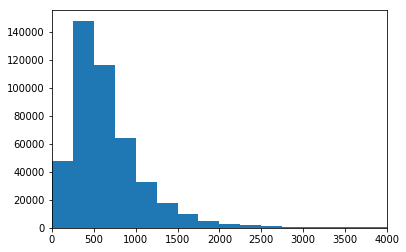

In [39]:
#trying to see distribution of duration sec by using pyplot hist function
bin_edges = np.arange(0,ford_bike_drop.duration_sec.max()+250,250)
plt.hist(data=ford_bike_drop,x='duration_sec',bins=bin_edges);
plt.xlim(0,4000);

In [40]:
#Extracting date from datetime data types
ford_bike_drop['start_date'] = ford_bike_drop.start_time.dt.date
ford_bike_drop['end_date'] = ford_bike_drop.end_time.dt.date

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#fixing year format from datetime data types
ford_bike_drop['start_year_month']= ford_bike_drop['start_time'].map(lambda x: x.strftime('%Y-%m'))
ford_bike_drop['end_year_month']= ford_bike_drop['end_time'].map(lambda x: x.strftime('%Y-%m'))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
#extracting year and month from datetime data types

ford_bike_drop['start_time_year'] = ford_bike_drop['start_time'].dt.year.astype(int)
ford_bike_drop['end_time_year'] = ford_bike_drop['end_time'].dt.year.astype(int)
ford_bike_drop['start_time_month'] = ford_bike_drop['start_time'].dt.month.astype(int)
ford_bike_drop['end_time_month'] = ford_bike_drop['end_time'].dt.month.astype(int)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [43]:
# extracting hour and minute from datetime dtypes
ford_bike_drop['star_time_hour_minute'] = ford_bike_drop['start_time'].map(lambda x: x.strftime('%H-%m'))
ford_bike_drop['end_time_hour_minute'] = ford_bike_drop['end_time'].map(lambda x: x.strftime('%H-%m'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
#extracting hour from datetime dtypes
ford_bike_drop['star_time_hour'] = ford_bike_drop['start_time'].dt.hour
ford_bike_drop['end_time_hour'] = ford_bike_drop['end_time'].dt.hour

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
#extracting weekdays from datetime dtypes
ford_bike_drop['start_time_weekday'] = ford_bike_drop['start_time'].dt.weekday_name
ford_bike_drop['end_time_weekday'] = ford_bike_drop['end_time'].dt.weekday_name

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
#extracting age from birth year
ford_bike_drop['age_member'] = 2019-ford_bike_drop['member_birth_year']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
#forgetting data that age > 60 because it is outlier
ford_bike_drop = ford_bike_drop[ford_bike_drop.age_member<=60]

In [48]:
#making age as categorical by putting it to bins
ford_bike_drop['age_bins'] = ford_bike_drop['age_member'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

# Q3 : What day is the busiest time?


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

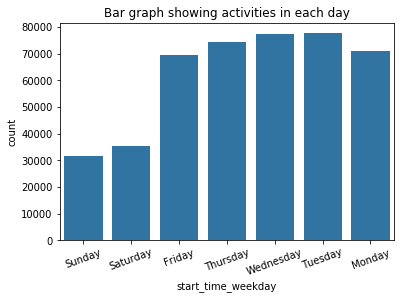

In [49]:
#showing count of activities in each day
sns.countplot(ford_bike_drop['start_time_weekday'],color=base_color);
plt.title("Bar graph showing activities in each day")
plt.xticks(rotation=20)

- as shown in the graph, surprisingly tuesday is the most busiest day

# Bivariate Exploration

In [50]:
ford_bike_drop.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_month,end_time_month,star_time_hour_minute,end_time_hour_minute,star_time_hour,end_time_hour,start_time_weekday,end_time_weekday,age_member,age_bins
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,12,1,16-12,15-01,16,15,Sunday,Monday,32.0,30 - 40
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,12,1,15-12,13-01,15,13,Sunday,Monday,54.0,50 - 60
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,12,1,14-12,02-01,14,2,Sunday,Monday,22.0,20 - 30
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,...,12,1,23-12,01-01,23,1,Sunday,Monday,28.0,20 - 30
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,12,1,23-12,00-01,23,0,Sunday,Monday,29.0,20 - 30


# Q4: When are most trips taken in terms of time of day and month of the year?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

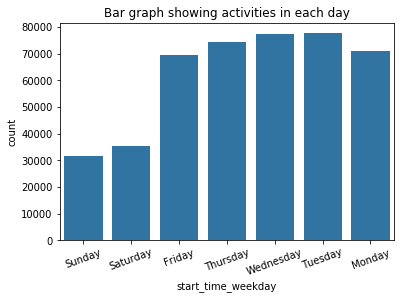

In [51]:
#showing count of activities in each day

sns.countplot(ford_bike_drop['start_time_weekday'],color=base_color);
plt.title("Bar graph showing activities in each day")
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

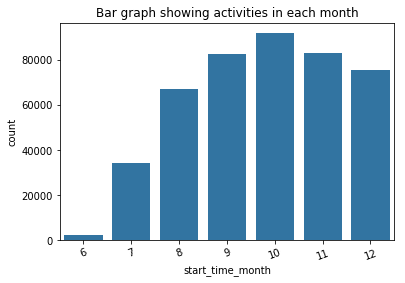

In [52]:
#showing count of activities in each day
sns.countplot(ford_bike_drop['start_time_month'],color=base_color);
plt.title("Bar graph showing activities in each month")
plt.xticks(rotation=20)

### answers
- In the matters of day, Tuesday is when the most trips taken
- In the matters of month, month 10 is when the most trips taken

# Q5: How long does the average trip take?



(0, 75)

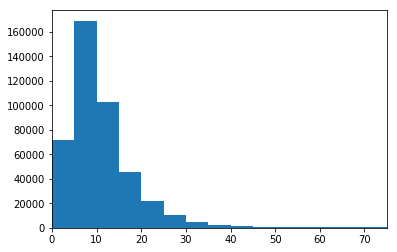

In [53]:
ford_bike_drop['duration_min'] = ford_bike_drop['duration_sec']/60
edges = np.arange(0,ford_bike_drop['duration_min'].max()+5,5)
plt.hist(ford_bike_drop['duration_min'],bins=edges);
plt.xlim(0,75)


# Q6: Are there any difference between subscribers and customers behaviors?


In [54]:
count_of_rides_per_user  = ford_bike_drop.groupby('user_type').size().reset_index(name='count')

In [55]:
ford_bike_drop['start_time_year_month_new'] = ford_bike_drop['start_time'].dt.strftime('%y' + '-' + '%m')


In [56]:
user_type_per_year_df = ford_bike_drop.groupby(["start_time_year_month_new", "user_type"]).size().reset_index()

In [57]:
import matplotlib.ticker as tick


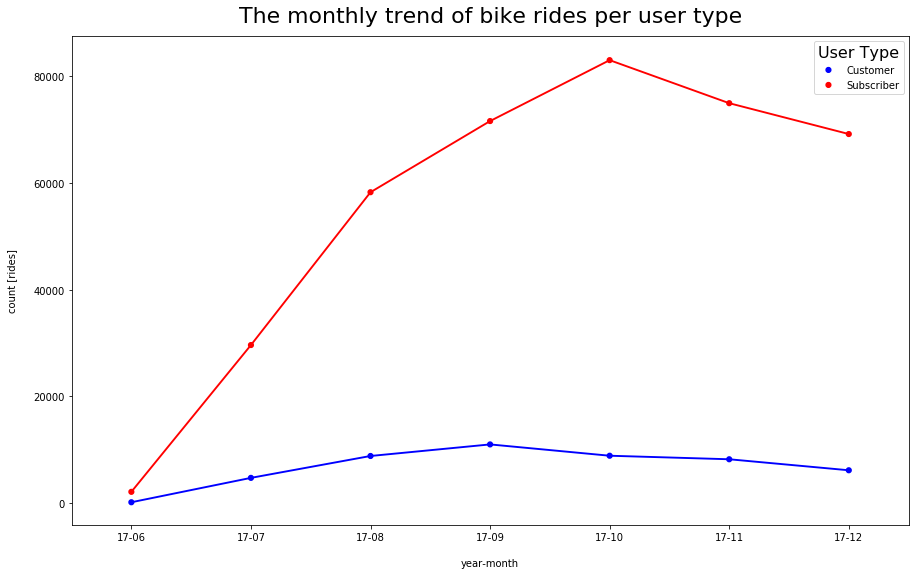

In [58]:
#defining my own color choice 
#plotting using pointplot because need to show trend or growth
# and adding 'hue' because wants to see different user_type
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'red', 'Customer':'blue'}
ax = sns.pointplot(x='start_time_year_month_new', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()



Text(0.5,0,'minutes [trip duration]')

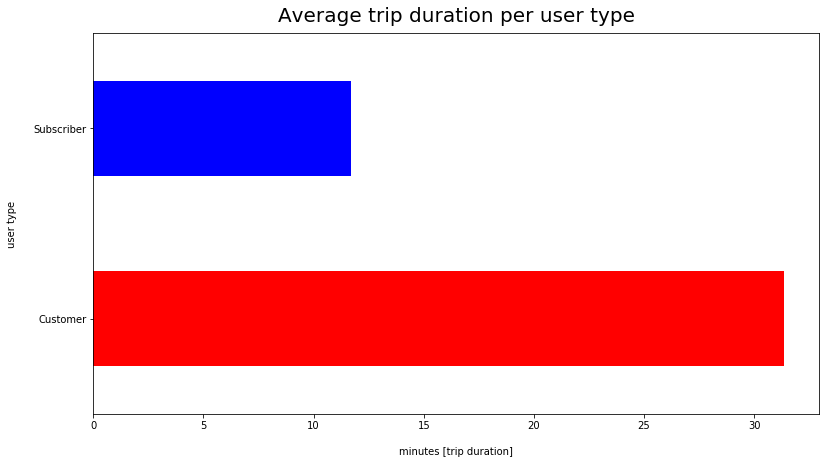

In [59]:
#defining color and plotting the grouped df using bar because it fits to comparing quantitty
new_color=['red', 'blue']
ax = ford_bike_drop.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)

In [60]:
#grouping data by subscriber for future uses
subscriber_age_df = ford_bike_drop[ford_bike_drop['user_type']=='Subscriber'].groupby(['start_time_year_month_new', 'age_bins']).agg({'bike_id':'count'}).reset_index()

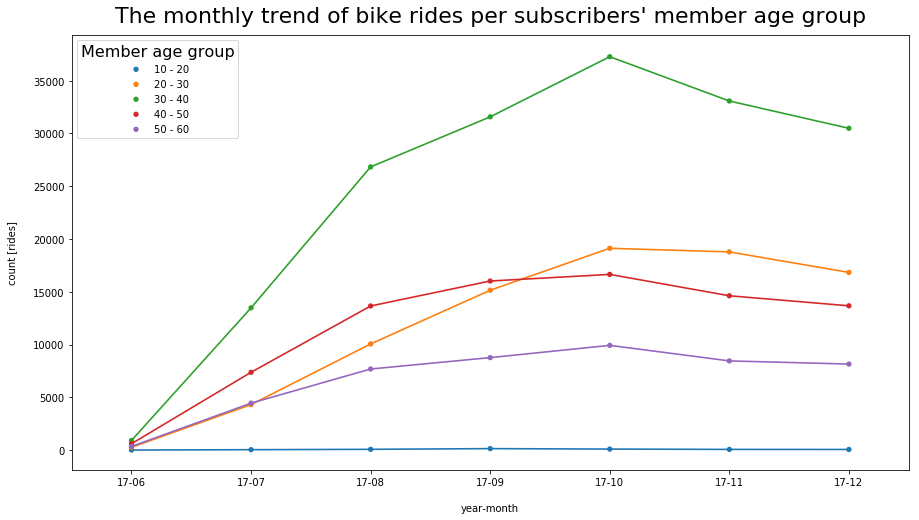

In [61]:
#using the grouped data to visualize it analyze user type subscriber
# using seaborn pointplot because it fits for using trend or growth
plt.figure(figsize=(15,8))
ax = sns.pointplot(x='start_time_year_month_new', y='bike_id', hue='age_bins', scale=.6, data=subscriber_age_df)
plt.title("The monthly trend of bike rides per subscribers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()



# Conclusion

- many of ford bike user are customer are subscriber
- every month subscriber user bike more than customer
- but customer tend to use bike longer(in term of time) than subscriber
- subscriber that use most often are between 30-40 years old